Loaded model from outputs/doodle/doodle_cnn_model.keras
Classes: ['The Eiffel Tower', 'The Great Wall of China', 'The Mona Lisa', 'aircraft carrier', 'airplane', 'alarm clock', 'ambulance', 'angel', 'animal migration', 'ant', 'anvil', 'apple', 'arm', 'asparagus', 'axe', 'backpack', 'banana', 'bandage', 'barn', 'baseball', 'baseball bat', 'basket', 'basketball', 'bat', 'bathtub', 'beach', 'bear', 'beard', 'bed', 'bee', 'belt', 'bench', 'bicycle', 'binoculars', 'bird', 'birthday cake', 'blackberry', 'blueberry', 'book', 'boomerang', 'bottlecap', 'bowtie', 'bracelet', 'brain', 'bread', 'bridge', 'broccoli', 'broom', 'bucket', 'bulldozer']

Sample images for testing:
  - doodle/data/split/test/birthday cake/234.png (label: birthday cake)
  - doodle/data/split/test/banana/1447.png (label: banana)
  - doodle/data/split/test/bed/98.png (label: bed)
  - doodle/data/split/test/basketball/1054.png (label: basketball)
  - doodle/data/split/test/barn/1548.png (label: barn)
  - doodle/data/split/te

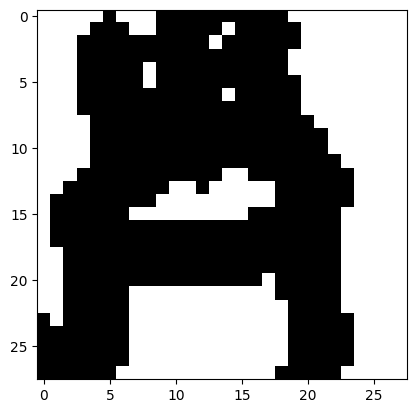

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step

Image: 234.png
  True label: birthday cake
  Top 3 predicted: ['birthday cake', 'The Eiffel Tower', 'bed'] (scores: ['0.74', '0.11', '0.10'])
Loaded image shape for prediction: (1, 28, 28, 1)
Pixel stats: min 0.0 max 255.0 mean 147.99107


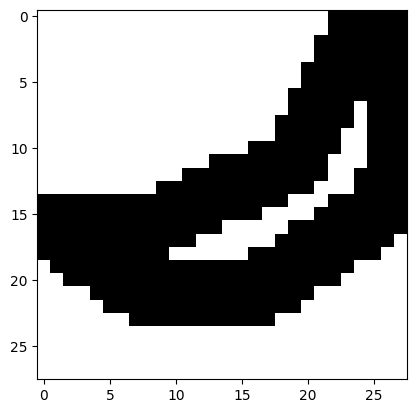

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

Image: 1447.png
  True label: banana
  Top 3 predicted: ['banana', 'boomerang', 'arm'] (scores: ['0.90', '0.07', '0.02'])
Loaded image shape for prediction: (1, 28, 28, 1)
Pixel stats: min 0.0 max 255.0 mean 148.96684


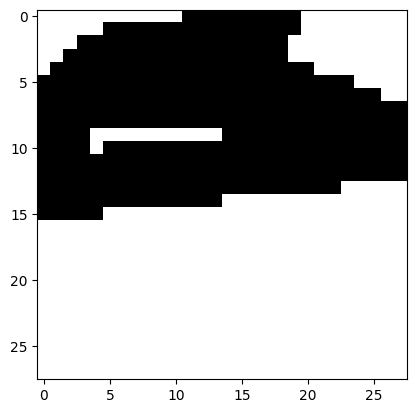

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

Image: 98.png
  True label: bed
  Top 3 predicted: ['aircraft carrier', 'airplane', 'The Great Wall of China'] (scores: ['0.76', '0.10', '0.03'])
Loaded image shape for prediction: (1, 28, 28, 1)
Pixel stats: min 0.0 max 255.0 mean 65.70153


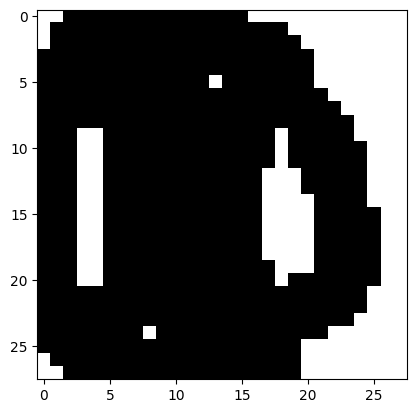

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

Image: 1054.png
  True label: basketball
  Top 3 predicted: ['basketball', 'baseball', 'backpack'] (scores: ['0.57', '0.15', '0.12'])
Loaded image shape for prediction: (1, 28, 28, 1)
Pixel stats: min 0.0 max 255.0 mean 145.38904


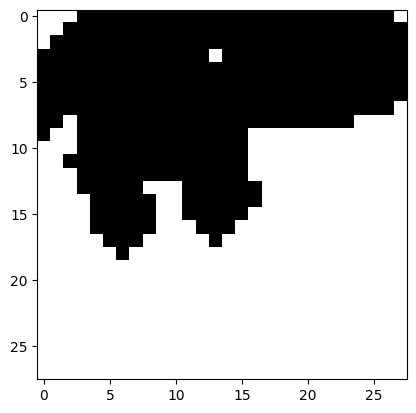

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

Image: 1548.png
  True label: barn
  Top 3 predicted: ['ant', 'bridge', 'bench'] (scores: ['0.43', '0.15', '0.06'])
Loaded image shape for prediction: (1, 28, 28, 1)
Pixel stats: min 0.0 max 255.0 mean 211.09056


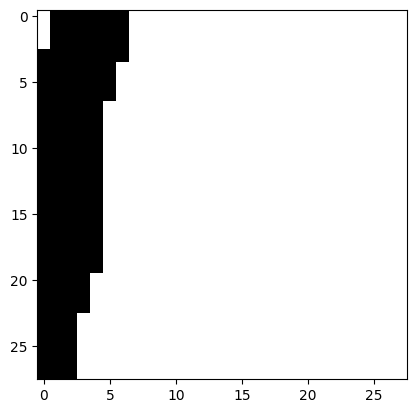

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

Image: 1985.png
  True label: broom
  Top 3 predicted: ['asparagus', 'broom', 'baseball bat'] (scores: ['0.73', '0.19', '0.04'])


In [6]:
import os
import json
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

# ---- CONFIG ----
KERAS_OUT = "outputs/doodle/doodle_cnn_model.keras"
CLASS_NAMES_PATH = "outputs/doodle/saved_model/class_names.json"
DATA_DIR = "doodle/data/split"
IMG_SIZE = 28
BATCH_SIZE = 32

# ---- LOAD MODEL & CLASS NAMES ----
model = tf.keras.models.load_model(KERAS_OUT)
with open(CLASS_NAMES_PATH, "r") as f:
    class_names = json.load(f)
print(f"Loaded model from {KERAS_OUT}")
print(f"Classes: {class_names}")

# ---- GET SAMPLE IMAGES FROM TEST SET ----

def get_random_image_from_class(class_name):
    class_dir = os.path.join(DATA_DIR, "test", class_name)
    files = os.listdir(class_dir)
    img_file = random.choice(files)
    img_path = os.path.join(class_dir, img_file)
    return img_path

sample_categories = random.sample(class_names, min(6, len(class_names)))
sample_images = [(get_random_image_from_class(c), c) for c in sample_categories]

print("\nSample images for testing:")
for img_path, category in sample_images:
    print(f"  - {img_path} (label: {category})")

def load_grayscale_image_pil(path, img_size):
    img = load_img(path, color_mode='grayscale', target_size=(img_size, img_size))
    arr = img_to_array(img)             # shape (28, 28, 1), dtype float32, values [0, 255]
    arr = np.expand_dims(arr, axis=0)   # shape (1, 28, 28, 1)
    return arr

for img_path, true_label in sample_images:
    img = load_grayscale_image_pil(img_path, 28)
    print("Loaded image shape for prediction:", img.shape)
    print("Pixel stats: min", img.min(), "max", img.max(), "mean", img.mean())
    plt.imshow(img[0, :, :, 0], cmap="gray")
    plt.show()
    preds = model.predict(img)
    top3_idx = np.argsort(preds[0])[::-1][:3]
    top3_names = [class_names[i] for i in top3_idx]
    top3_scores = [preds[0][i] for i in top3_idx]
    print(f"\nImage: {os.path.basename(img_path)}")
    print(f"  True label: {true_label}")
    print(f"  Top 3 predicted: {top3_names} (scores: {[f'{s:.2f}' for s in top3_scores]})")


Found 10000 files belonging to 50 classes.
Manual load - min: 0.0 max: 1.0 mean: 0.5816327
tf.data load - min: 0.0 max: 255.0 mean: 129.77678


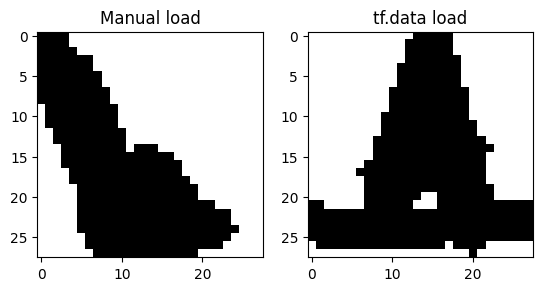

In [3]:
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt

img_path = "doodle/data/split/test/broom/1457.png"

# A. Load via Keras utility (like your manual script)
img_pil = load_img(img_path, color_mode='grayscale', target_size=(28, 28))
arr_pil = img_to_array(img_pil) / 255.0

# B. Load via tf.data like in training/validation
test_ds = tf.keras.utils.image_dataset_from_directory(
    "doodle/data/split/test",
    labels="inferred",
    label_mode="categorical",
    color_mode="grayscale",
    image_size=(28, 28),
    batch_size=1,
    shuffle=False,
)
found = False
for batch, labels in test_ds:
    # This finds the image by filename
    if hasattr(batch, "numpy"):
        arr_ds = batch.numpy()[0]
        break

print("Manual load - min:", arr_pil.min(), "max:", arr_pil.max(), "mean:", arr_pil.mean())
print("tf.data load - min:", arr_ds.min(), "max:", arr_ds.max(), "mean:", arr_ds.mean())

plt.subplot(1,2,1)
plt.imshow(arr_pil.squeeze(), cmap='gray')
plt.title("Manual load")
plt.subplot(1,2,2)
plt.imshow(arr_ds.squeeze(), cmap='gray')
plt.title("tf.data load")
plt.show()